## Prediction of the Interpretations of Movies

<img src='https://raw.githubusercontent.com/Masterx-AI/Project_Movie_Rating_Sentiment_Analysis_/main/mv.jpg'>

<h2>Description:</h2>
The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

movie.csv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
movie.csv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

<ul>
    <li>negative</li>
    <li>positive</li>
</ul>

<h2>Dataset links:</h2>

 - Kaggle: https://www.kaggle.com/yasserh/imdb-movie-ratings-sentiment-analysis#
 - The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

<h2>Objective:</h2>

Understand the Dataset & cleanup (if required).
    
 - Build classification models to predict the ratings of the movie.
 - Compare the evaluation metrics of vaious classification algorithms.

## Building Passive Aggressive Classifier to Prediction

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from zipfile import ZipFile

### Extract .zip file

In [2]:
with ZipFile('movie.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

### Importing the data

In [3]:
df=pd.read_csv('movie.csv')
LABEL=df['label']
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


### Data Preprocessing 

In [4]:
LABEL.value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [5]:
df.shape

(40000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.duplicated().sum()

277

We have 277 duplicated rows. Now, let's drop them from our dataset to avoid overfitting.

In [9]:
dp = df[df.duplicated(keep=False)]
dp.head(2)
df.drop_duplicates(inplace= True)
print("{} duplicated data.".format(df.duplicated().sum()))

0 duplicated data.


### Sentiment Types on Histogram

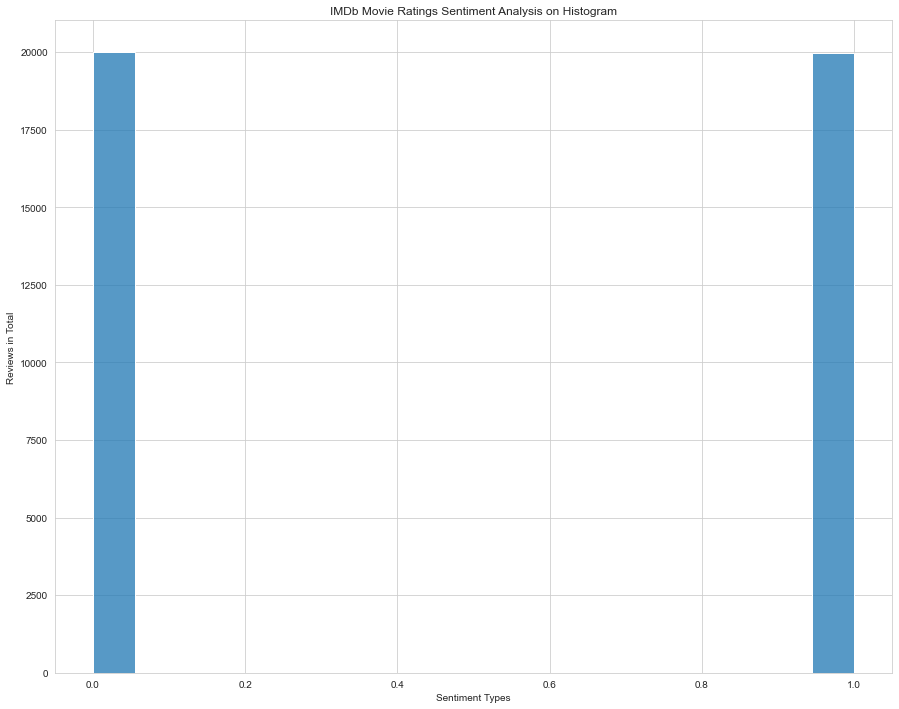

In [10]:
plt.figure(figsize = (15, 12))
sns.set_style('whitegrid')    
sns.histplot(data=LABEL)
plt.title("IMDb Movie Ratings Sentiment Analysis on Histogram")
plt.xlabel("Sentiment Types")
plt.ylabel("Reviews in Total")
plt.show()

In [11]:
labels=df.label
labels.head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: label, dtype: int64

### Train - Test Split

In [12]:
x_train, x_test, y_train, y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

### Initialize a TfidfVectorizer

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

### Fit and transform train set, transform test set

In [14]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

### Initialize a PassiveAggressiveClassifier

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate.

To learn more check: 
<ul>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html</li>
    <li>https://scikit-learn.org/stable/modules/linear_model.html#passive-aggressive</li>
</ul>

In [15]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

### Predict on the test set and calculate accuracy

In [16]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {score}')

Accuracy score: 0.8814348646947766


### Confusion Matrix of Model

<img src='https://miro.medium.com/max/1000/0*FbtRyQH1pU_pOy7b.png'>

In [17]:
cm=confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\nConfusion Matrix (PassiveAggressiveClassifier):\n", cm)


Confusion Matrix (PassiveAggressiveClassifier):
 [[3419  487]
 [ 455 3584]]


### Prediction

In [18]:
class_map = {0: "Negative", 
            1: "Positive"}

In [19]:
# For an instance:
#pred=['It was amazing!']
#pred=['It was horrible!']

pred = ["A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defines itself by its hatred of Microsoft. They have been instrumental in filing antitrust complaints against Microsoft. So, were they silly enough to think this bad movie would add fuel to that fire?<br /><br />There's no public record I see of SUN's involvement, but clearly the makers of this movie know Scott McNealy. An interesting mystery."]
my_pred = tfidf_vectorizer.transform(pred)

my_predClass = pac.predict(my_pred)
print(f"Model predicted your sentiment as {class_map[int(my_predClass[0])]}.")

Model predicted your sentiment as Negative.


### Save PAC model via Pickle

In [20]:
import pickle

pickle_file = open('pac.pkl', 'ab')
pickle.dump(pac, pickle_file)                     
pickle_file.close()

## Building XGBoost Classifier to Prediction

In [21]:
from xgboost import XGBClassifier

In [22]:
classifier= XGBClassifier()
classifier.fit(tfidf_train, y_train)

[02:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_pred = classifier.predict(tfidf_test)

### Building confusion matrix

In [24]:
cm2 = confusion_matrix(y_pred, y_test)  #  Comparing results
print("\nConfusion Matrix(XGBoost):\n", cm2)


Confusion Matrix(XGBoost):
 [[3231  478]
 [ 675 3561]]


In [25]:
print(f"\nAccuracy score (XGBoost): {accuracy_score(y_test, y_pred)}")


Accuracy score (XGBoost): 0.8548772813089994


### Prediction

In [26]:
# For an instance:
#xgb_sentiment=['It was amazing!']
#xgb_sentiment=['It was horrible!']

xgb_sentiment = ["A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defines itself by its hatred of Microsoft. They have been instrumental in filing antitrust complaints against Microsoft. So, were they silly enough to think this bad movie would add fuel to that fire?<br /><br />There's no public record I see of SUN's involvement, but clearly the makers of this movie know Scott McNealy. An interesting mystery."]
xgb_sentiment_trans = tfidf_vectorizer.transform(xgb_sentiment)
xgb_pred = classifier.predict(xgb_sentiment_trans)

print(f"Model predicted your sentiment as {class_map[int(xgb_pred[0])]}.")

Model predicted your sentiment as Negative.


### Save XGBoost model via Pickle

In [27]:
import pickle

pickle_file = open('xgboost.pkl', 'ab')
pickle.dump(classifier, pickle_file)                     
pickle_file.close()